## To classify whether a person will have a stroke or not

1) Data Preprocessing.

2) Data Visualization.

3) Correlation matrix, Splitting data using train_test_split.

4) Applying appropriate model(regression/classification).

5) Training the model.

6) Testing the model.

7) Check the accuracy using appropriate metrices(fscore/rscore/confusion matrix etc.)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Importing Dataset

In [2]:
stroke = pd.read_csv("stroke_analysis.csv")

In [3]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0.0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0.0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0.0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1.0,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5106.000000,5109.000000,5110.000000,5109.000000,4909.000000,5110.000000
mean,36517.829354,43.208186,0.097475,0.054012,106.155060,28.893237,0.048728
std,21161.721625,22.607195,0.296633,0.226063,45.284917,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.260000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.890000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Handiling Missing Values

In [5]:
stroke.isna().sum()

id                     0
gender                 2
age                    4
hypertension           1
heart_disease          0
ever_married           2
work_type              3
Residence_type         2
avg_glucose_level      1
bmi                  201
smoking_status         6
stroke                 0
dtype: int64

Since, BMI has 201 null values so instead of dropping null values we will fill null values with the mean value 

In [6]:
stroke['bmi'].fillna(stroke['bmi'].mean(),inplace=True)

In [7]:
stroke.isna().sum()

id                   0
gender               2
age                  4
hypertension         1
heart_disease        0
ever_married         2
work_type            3
Residence_type       2
avg_glucose_level    1
bmi                  0
smoking_status       6
stroke               0
dtype: int64

For the rest of the null value we will drop them

In [8]:
stroke.dropna(inplace=True)

In [9]:
stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0.0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0.0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0.0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0.0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1.0,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Data Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

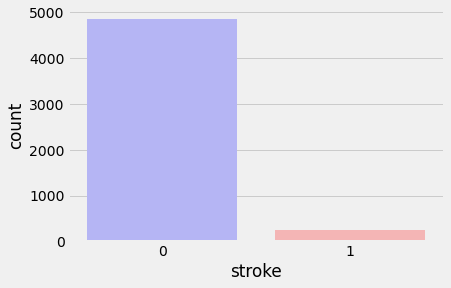

In [11]:
sns.countplot(x="stroke", data=stroke, palette="bwr" )
plt.show

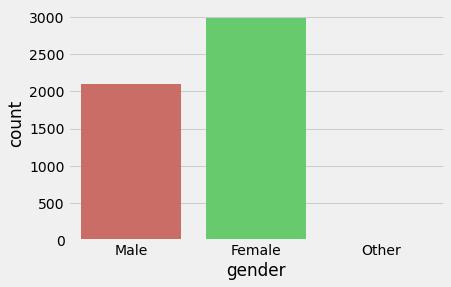

In [12]:
sns.countplot(x="gender", data=stroke, palette="hls")
plt.show()

In [3]:
#pd.crosstab(stroke.bmi,stroke.stroke).plot(kind="bar",figsize=(20,6))
#plt.title('BMI vs Stroke Frequency')
#plt.xlabel('BMI')
#plt.ylabel('Stroke')
#plt.show()

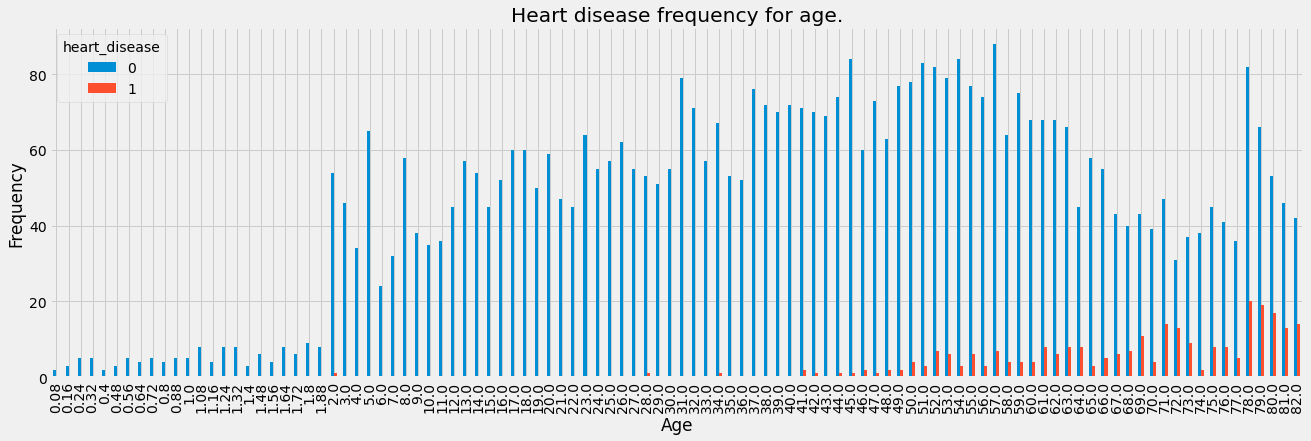

In [14]:
pd.crosstab(stroke.age,stroke.heart_disease).plot(kind="bar",figsize=(20,6))
plt.title("Heart disease frequency for age.")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [15]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0.0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0.0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0.0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0.0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1.0,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [16]:
stroke['smoking_status'].value_counts()

never smoked       1886
Unknown            1543
formerly smoked     881
smokes              783
Name: smoking_status, dtype: int64

In [17]:
stroke['Residence_type'].value_counts()

Urban    2593
Rural    2500
Name: Residence_type, dtype: int64

In [18]:
stroke['ever_married'].replace({'Yes' : 1, 'No' : 0}, inplace = True)

In [19]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0.0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0.0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0.0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0.0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1.0,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


In [20]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [21]:
x = stroke[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
y = stroke['stroke']

In [22]:
# Converting Categorical Values into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorerical_features = ["gender","work_type","Residence_type","smoking_status"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one+hot",
                                 one_hot,
                                 categorerical_features)],
                                 remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

array([[  0.        ,   1.        ,   0.        , ...,   1.        ,
        228.69      ,  36.6       ],
       [  1.        ,   0.        ,   0.        , ...,   1.        ,
        202.21      ,  28.89323691],
       [  0.        ,   1.        ,   0.        , ...,   1.        ,
        105.92      ,  32.5       ],
       ...,
       [  1.        ,   0.        ,   0.        , ...,   1.        ,
         82.99      ,  30.6       ],
       [  0.        ,   1.        ,   0.        , ...,   1.        ,
        166.29      ,  25.6       ],
       [  1.        ,   0.        ,   0.        , ...,   1.        ,
         85.28      ,  26.2       ]])

In [23]:
df1 = pd.DataFrame(transformed_x)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,228.69,36.600000
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0,0.0,1.0,202.21,28.893237
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,105.92,32.500000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,171.23,34.400000
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,174.12,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,80.0,1.0,0.0,1.0,83.75,28.893237
5089,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,125.20,40.000000
5090,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,82.99,30.600000
5091,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,166.29,25.600000


In [24]:
df2 = x[['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi',]]
df2

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
0,67.0,0.0,1,1,228.69,36.600000
1,61.0,0.0,0,1,202.21,28.893237
2,80.0,0.0,1,1,105.92,32.500000
3,49.0,0.0,0,1,171.23,34.400000
4,79.0,1.0,0,1,174.12,24.000000
...,...,...,...,...,...,...
5105,80.0,1.0,0,1,83.75,28.893237
5106,81.0,0.0,0,1,125.20,40.000000
5107,35.0,0.0,0,1,82.99,30.600000
5108,51.0,0.0,0,1,166.29,25.600000


In [25]:
df1['Join col'] = range(0, df1.shape[0])
df2['Join col'] = range(0, df2.shape[0])

#Concating both the dataframes into one
x_scaled = pd.concat([df1.set_index('Join col'), df2.set_index('Join col')], axis = 1)
x_scaled.reset_index(inplace = True, drop = True)
x_scaled

<ipython-input-25-a0ba500b222e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Join col'] = range(0, df2.shape[0])


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,228.69,36.600000,67.0,0.0,1,1,228.69,36.600000
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,202.21,28.893237,61.0,0.0,0,1,202.21,28.893237
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,105.92,32.500000,80.0,0.0,1,1,105.92,32.500000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,171.23,34.400000,49.0,0.0,0,1,171.23,34.400000
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,174.12,24.000000,79.0,1.0,0,1,174.12,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,83.75,28.893237,80.0,1.0,0,1,83.75,28.893237
5089,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,125.20,40.000000,81.0,0.0,0,1,125.20,40.000000
5090,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,82.99,30.600000,35.0,0.0,0,1,82.99,30.600000
5091,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,166.29,25.600000,51.0,0.0,0,1,166.29,25.600000


#### Coleration Matrix

<AxesSubplot:>

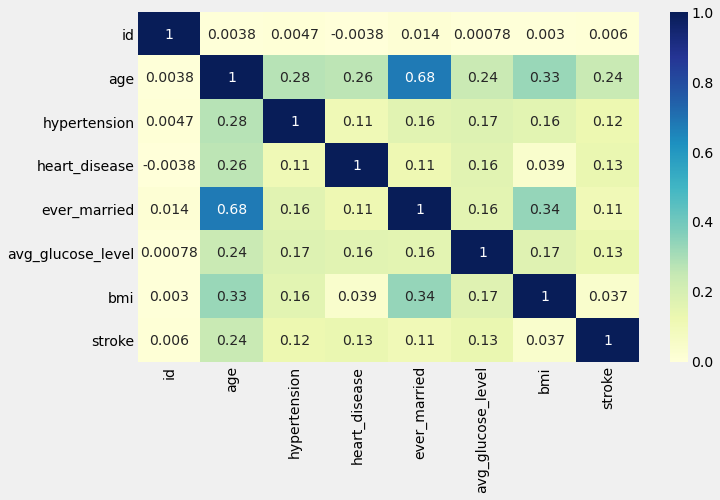

In [26]:
corelation = stroke.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corelation,annot=True, cmap="YlGnBu")

### Split The Data

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [28]:
#Importing LoReg
from sklearn.linear_model import LogisticRegression

#Training the model
model = LogisticRegression()
model.fit(x_train, y_train)#Training on train dataset

#Prediction and scoring on train dataset
model.predict(x_train)#Prediction on train dataset
model.score(x_train, y_train)#Calculating score on training dataset

C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9560628375061365

In [29]:
model.score(x_test,y_test)

0.9401373895976447

In [30]:
from sklearn.metrics import accuracy_score

#Prediction and scoring on test dataset
y_pred = model.predict(x_test)#Prediction on test dataset
print('Accuracy on test data - ' , accuracy_score(y_test, y_pred))#Calculating score on test dataset

Accuracy on test data -  0.9401373895976447


In [31]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       958
           1       0.00      0.00      0.00        61

    accuracy                           0.94      1019
   macro avg       0.47      0.50      0.48      1019
weighted avg       0.88      0.94      0.91      1019



C:\Users\prana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


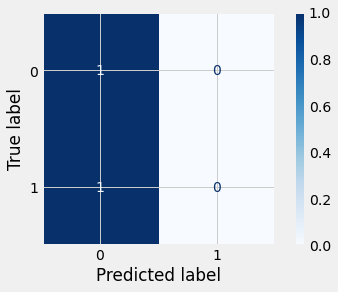

In [32]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues, normalize = 'true')
plt.show()  

In [1]:
#plt.plot(y_test,y_pred)
#plt.show()

In [2]:
# RoC Curve
#from sklearn .metrics import roc_auc_score 
#print(roc_auc_score(y_test,y_pred))